In [3]:
def calculate_m_values(s_value):
    m_values=[]
    m=-s_value
    while m<=s_value:
        m_values.append(m)
        m+=1
    return m_values

l=calculate_m_values(5/2)
print(l)

[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]


In [6]:
#Calculate combination of operators
import sympy as sp
from sympy.physics.quantum import qapply, OrthogonalKet, OrthogonalBra
from sympy.matrices import Matrix

s, h = sp.symbols('s, h')

def S_plusK(s, m):
    return h * sp.sqrt(s * (s + 1) - m * (m + 1))*(OrthogonalKet(m+1))

def S_minusK(s, m):
    return h * sp.sqrt(s * (s + 1) - m * (m - 1))*(OrthogonalKet(m-1))

# Define the spin operators S_x, S_y, S_z, S_+, s_-
def S_xK(s, m):
    return (S_plusK(s, m) + S_minusK(s, m)) / 2

def S_yK(s, m):
    return (S_plusK(s, m) - S_minusK(s, m)) / (2 * sp.I)

def S_zK(s, m):
    return m * h*(OrthogonalKet(m))

def S_plusB(s, m):
    return h * sp.sqrt(s * (s + 1) - m * (m + 1))*(OrthogonalBra(m+1))

def S_minusB(s, m):
    return h * sp.sqrt(s * (s + 1) - m * (m - 1))*(OrthogonalBra(m-1))

def S_xB(s, m):
    return (S_plusB(s, m) + S_minusB(s, m)) / 2

def S_yB(s, m):
    return (S_plusB(s, m) - S_minusB(s, m)) / (2 * sp.I)

def S_zB(s, m):
    return m * h*(OrthogonalBra(m))

def calculate_matrix_elements(s_value):
    matrix_elements = []
    matrix_final=[]
    m1=calculate_m_values(s_value)
    m2=calculate_m_values(s_value)
    for i in m1:
     for j in m2:
            SxSy_element = qapply(S_xB(s_value, i) * S_yK(s_value,j))
            matrix_elements.append((i, j, SxSy_element))
            matrix_final.append(SxSy_element)
    return matrix_elements, Matrix(int(2*s_value+1),int(2*s_value+1),matrix_final)

s_value = 1/2

matrix_elements, matrix_final = calculate_matrix_elements(s_value)

# Print the symbolic matrix elements
for element in matrix_elements:
        print(f"m1={element[0]}, m2={element[1]}, SxSy element: {element[2]}")

print(matrix_final);matrix_final

m1=-0.5, m2=-0.5, SxSy element: -0.25*I*h**2
m1=-0.5, m2=0.5, SxSy element: 0
m1=0.5, m2=-0.5, SxSy element: 0
m1=0.5, m2=0.5, SxSy element: 0.25*I*h**2
Matrix([[-0.25*I*h**2, 0], [0, 0.25*I*h**2]])


Matrix([
[-0.25*I*h**2,           0],
[           0, 0.25*I*h**2]])

In [7]:
#Calculate matrix of single operator

def calculate_matrix_elementsS(s_value,D):
    matrix_elements = []
    matrixS_final=[]
    m1=calculate_m_values(s_value)
    m2=calculate_m_values(s_value)
    MD=2*s_value+1
    functions = {'x': S_xK, 'y': S_yK, 'z': S_zK}
    if D.lower() in functions:
     for i in m1:
      for j in m2:
            Sy_element = qapply(OrthogonalBra(i) * functions[D.lower()](s_value,j))
            matrix_elements.append((i, j, Sy_element))
            matrixS_final.append(Sy_element)
     return Matrix(int(MD),int(MD),matrixS_final)
    else:
     return "Invalid input! Only 'x', 'y', and 'z' are allowed.","Start again"

s_value = 1

matrixS_final = calculate_matrix_elementsS(s_value,'z')

# Print the symbolic matrix elements
print(matrixS_final);matrixS_final

Matrix([[-h, 0, 0], [0, 0, 0], [0, 0, h]])


Matrix([
[-h, 0, 0],
[ 0, 0, 0],
[ 0, 0, h]])

In [9]:
M=sp.Matrix([[-11275.81,-10.434700,6.754509],[-10.634700,-11294.001581,-7.599539],[6.754509,-7.599539,-11283.45192]])
print(M);M
n=sp.symbols('n')
X = sp.MatrixSymbol('X', n, n)
Y = sp.MatrixSymbol('Y', n, n)
Z = sp.MatrixSymbol('Z', n, n)
Angr=sp.BlockMatrix([X,Y,Z])
Angc=sp.BlockMatrix([[X],[Y],[Z]])
Final_Matrix=sp.block_collapse(Angr*M*Angc)
Final = sp.simplify(str(Final_Matrix))
print(Final);Final

Matrix([[-11275.8100000000, -10.4347000000000, 6.75450900000000], [-10.6347000000000, -11294.0015810000, -7.59953900000000], [6.75450900000000, -7.59953900000000, -11283.4519200000]])
Matrix([[-11275.81*X**2 - 21.0694*X*Y + 13.509018*X*Z - 11294.001581*Y**2 - 15.199078*Y*Z - 11283.45192*Z**2]])


Matrix([[-11275.81*X**2 - 21.0694*X*Y + 13.509018*X*Z - 11294.001581*Y**2 - 15.199078*Y*Z - 11283.45192*Z**2]])

In [10]:
X=calculate_matrix_elementsS(1,'x')
Y=calculate_matrix_elementsS(1,'y')
Z=calculate_matrix_elementsS(1,'z')

print(Final)
H=sp.simplify(X*(X+2*Y-Z)+Y*(2*X+Z)-Z*(X-Y+Z))
print(H);H


Matrix([[-11275.81*X**2 - 21.0694*X*Y + 13.509018*X*Z - 11294.001581*Y**2 - 15.199078*Y*Z - 11283.45192*Z**2]])
Matrix([[-h**2/2, sqrt(2)*h**2*(1 - I)/2, h**2*(1 + 4*I)/2], [sqrt(2)*h**2*(1 + I)/2, h**2, sqrt(2)*h**2*(-1 + I)/2], [h**2*(1 - 4*I)/2, -sqrt(2)*h**2*(1 + I)/2, -h**2/2]])


Matrix([
[               -h**2/2,  sqrt(2)*h**2*(1 - I)/2,        h**2*(1 + 4*I)/2],
[sqrt(2)*h**2*(1 + I)/2,                    h**2, sqrt(2)*h**2*(-1 + I)/2],
[      h**2*(1 - 4*I)/2, -sqrt(2)*h**2*(1 + I)/2,                 -h**2/2]])

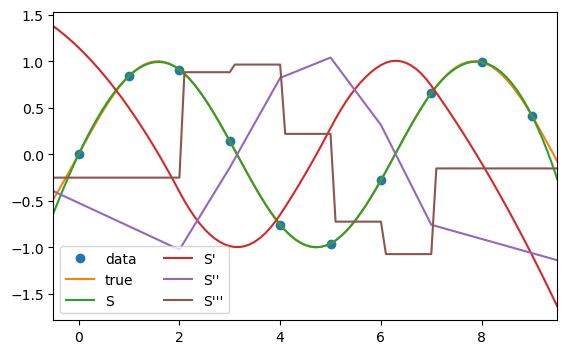

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

print(cs)